In [23]:
#imports
import matplotlib as mpl
import calmap
import calplot
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
from pprint import pprint

In [2]:
summary2015 = pd.read_csv('../Data_Cleaning/clean_data/focused_airports_2015.csv')
summary2016 = pd.read_csv('../Data_Cleaning/clean_data/focused_airports_2016.csv')
summary2017 = pd.read_csv('../Data_Cleaning/clean_data/focused_airports_2017.csv')
summary2018 = pd.read_csv('../Data_Cleaning/clean_data/focused_airports_2018.csv')

summary1 = summary2015.append(summary2016)
summary2 = summary1.append(summary2017)
summary = summary2.append(summary2018)

In [3]:
summary_date = summary.set_index('Date', inplace=True)
summary_date = summary.index = pd.to_datetime(summary.index)

In [4]:
cancelled = summary.loc[summary["Weather Delay"] == "CANCELLED"]
cancelled = cancelled.drop(columns=['Destination', 'Expected Departure Time', 'Expected Arrival Time', 'Distance'])

In [5]:
non_cancelled = summary.loc[summary["Weather Delay"] != "CANCELLED"]
non_cancelled = non_cancelled.drop(columns=['Destination', 'Expected Departure Time', 'Expected Arrival Time', 'Distance'])

In [6]:
dfw_c = cancelled.loc[cancelled["Origin"] == "DFW"].resample('D').count().reset_index()
atl_c = cancelled.loc[cancelled["Origin"] == "ATL"].resample('D').count().reset_index()
den_c = cancelled.loc[cancelled["Origin"] == "DEN"].resample('D').count().reset_index()
lax_c = cancelled.loc[cancelled["Origin"] == "LAX"].resample('D').count().reset_index()
oha_c = cancelled.loc[cancelled["Origin"] == "ORD"].resample('D').count().reset_index()

In [7]:
dfw_nc = non_cancelled.loc[non_cancelled["Origin"] == "DFW"].resample('D').count().reset_index()
atl_nc = non_cancelled.loc[non_cancelled["Origin"] == "ATL"].resample('D').count().reset_index()
den_nc = non_cancelled.loc[non_cancelled["Origin"] == "DEN"].resample('D').count().reset_index()
lax_nc = non_cancelled.loc[non_cancelled["Origin"] == "LAX"].resample('D').count().reset_index()
oha_nc = non_cancelled.loc[non_cancelled["Origin"] == "ORD"].resample('D').count().reset_index()

In [28]:
daily_cancels = cancelled.resample('D').count()
daily_nc = non_cancelled.resample('D').count()
daily_cancels = daily_cancels["Weather Delay"].reset_index()
daily_nc = daily_nc["Weather Delay"].reset_index()

daily_summed = pd.merge(daily_cancels, daily_nc, on="Date")
daily_summed = daily_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

daily_summed["Total Flights"] = daily_summed["# Cancelled Flights"] + daily_summed["# Non-Cancelled Flights"]
daily_summed["Cancel Rate (%)"] = (daily_summed["# Cancelled Flights"] / daily_summed["Total Flights"]) * 100

daily_summed['Date'] = pd.to_datetime(daily_summed['Date'])

instance = daily_summed['Date']
instance

#print("ISO Date:{}".format(instance.isocalendar()))

#daily_summed = daily_summed.set_index('Date')

# daily_summed.head()

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
1456   2018-12-27
1457   2018-12-28
1458   2018-12-29
1459   2018-12-30
1460   2018-12-31
Name: Date, Length: 1461, dtype: datetime64[ns]

In [9]:
dfw_summed = pd.merge(dfw_c, dfw_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
dfw_summed = dfw_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

dfw_summed["Total Flights"] = dfw_summed["# Cancelled Flights"] + dfw_summed["# Non-Cancelled Flights"]
dfw_summed["Cancel Rate (%)"] = (dfw_summed["# Cancelled Flights"] / dfw_summed["Total Flights"]) * 100

In [11]:
atl_summed = pd.merge(atl_c, atl_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
atl_summed = atl_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

atl_summed["Total Flights"] = atl_summed["# Cancelled Flights"] + atl_summed["# Non-Cancelled Flights"]
atl_summed["Cancel Rate (%)"] = (atl_summed["# Cancelled Flights"] / atl_summed["Total Flights"]) * 100

In [12]:
den_summed = pd.merge(den_c, den_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
den_summed = den_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

den_summed["Total Flights"] = den_summed["# Cancelled Flights"] + den_summed["# Non-Cancelled Flights"]
den_summed["Cancel Rate (%)"] = (den_summed["# Cancelled Flights"] / den_summed["Total Flights"]) * 100

In [13]:
lax_summed = pd.merge(lax_c, lax_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
lax_summed = lax_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

lax_summed["Total Flights"] = lax_summed["# Cancelled Flights"] + lax_summed["# Non-Cancelled Flights"]
lax_summed["Cancel Rate (%)"] = (lax_summed["# Cancelled Flights"] / lax_summed["Total Flights"]) * 100

In [14]:
ord_summed = pd.merge(oha_c, oha_nc, on="Date").drop(columns=['Origin_x', 'Origin_y'])
ord_summed = ord_summed.rename(columns={"Weather Delay_x": "# Cancelled Flights", 
                                                 "Weather Delay_y": "# Non-Cancelled Flights"})

ord_summed["Total Flights"] = ord_summed["# Cancelled Flights"] + ord_summed["# Non-Cancelled Flights"]
ord_summed["Cancel Rate (%)"] = (ord_summed["# Cancelled Flights"] / ord_summed["Total Flights"]) * 100

AttributeError: 'DatetimeIndex' object has no attribute 'isocalendar'

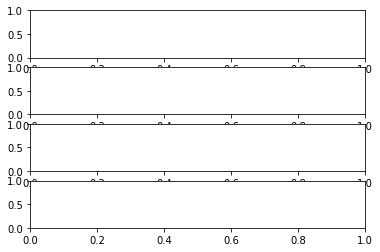

In [24]:
#totals map
totals = pd.Series(daily_summed["# Cancelled Flights"]).astype(float)
totals.head()


#calmap.calendarplot(data=totals, yearlabels=True)

#calmap.calendarplot(totals, yearlabels=True, yearascending=True, yearlabel_kws=None, subplot_kws=None, gridspec_kws=None, fig_kws=None, **kwargs)